In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cols = ["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv('magic04.data', names=cols)

In [3]:
df['class'] = (df['class']=='g').astype(int)

In [4]:
train, val, test = np.split(df.sample(frac=1),[int(0.6*len(df)), int(0.8*len(df))])

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [5]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [6]:
def preprocess(dataframe, oversampling=False):
  x = dataframe[cols[:-1]].values
  y = dataframe[cols[-1]].values

  scaler = StandardScaler()
  x= scaler.fit_transform(x)

  if oversampling:
    rs = RandomOverSampler()
    x,y = rs.fit_resample(x,y)

  train = np.hstack((x, np.reshape(y, (-1,1))))
  return train, x, y

In [7]:
train, x_train, y_train = preprocess(train, oversampling = True)
val, x_val, y_val = preprocess(val, oversampling = False)
test, x_test, y_test = preprocess(test, oversampling = False)

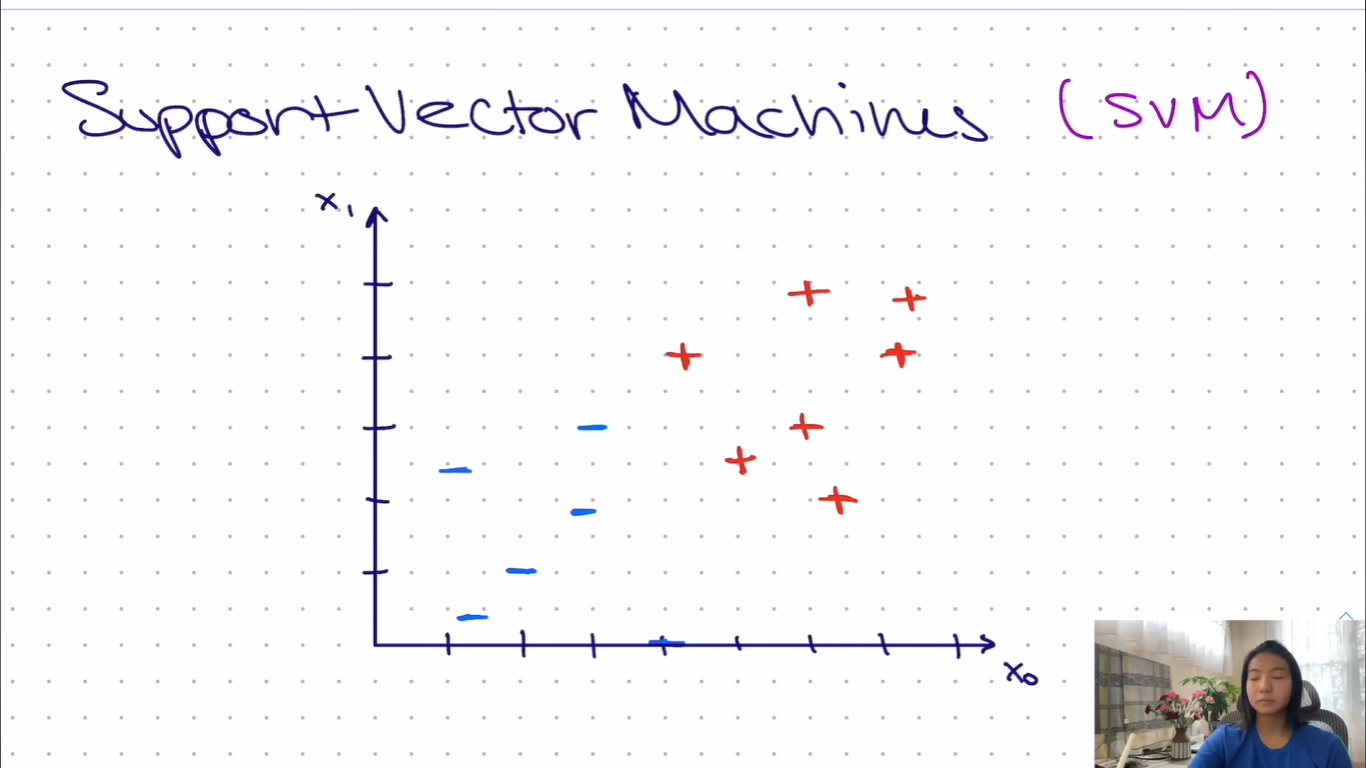

SVM is basically about finding a hyperplane which best divides our two classes.

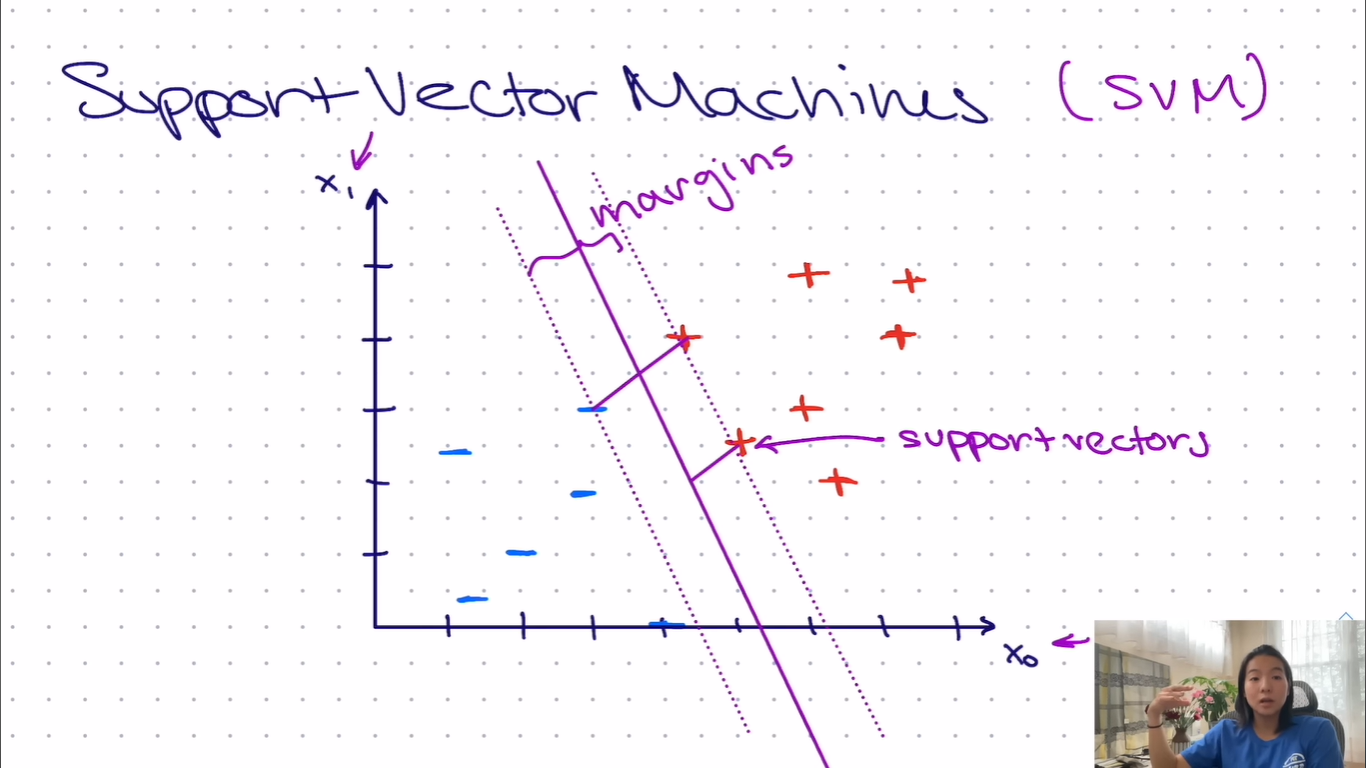

Our goal is to find the maximum margins.

Very sensitive to outliers.

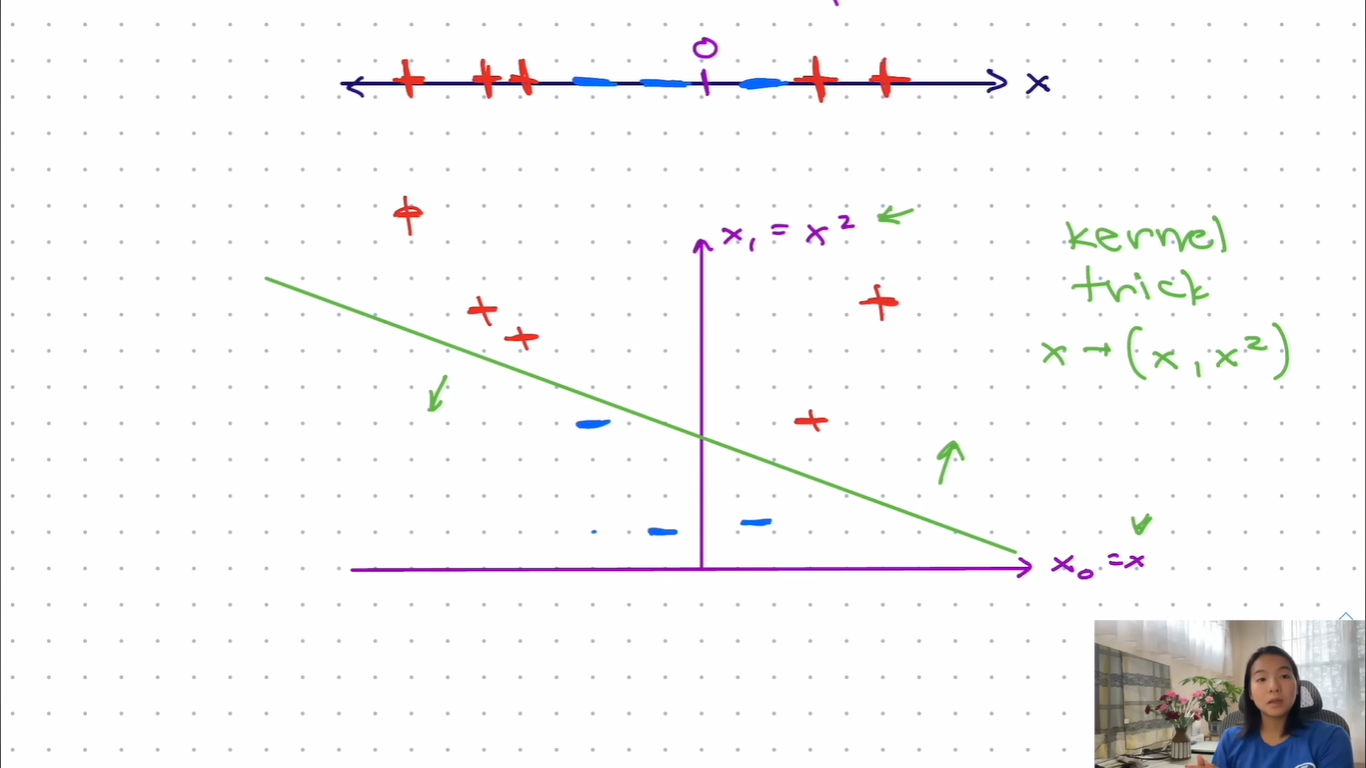

In [8]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report

svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

y_pred= svm_model.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79      1305
           1       0.89      0.89      0.89      2499

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



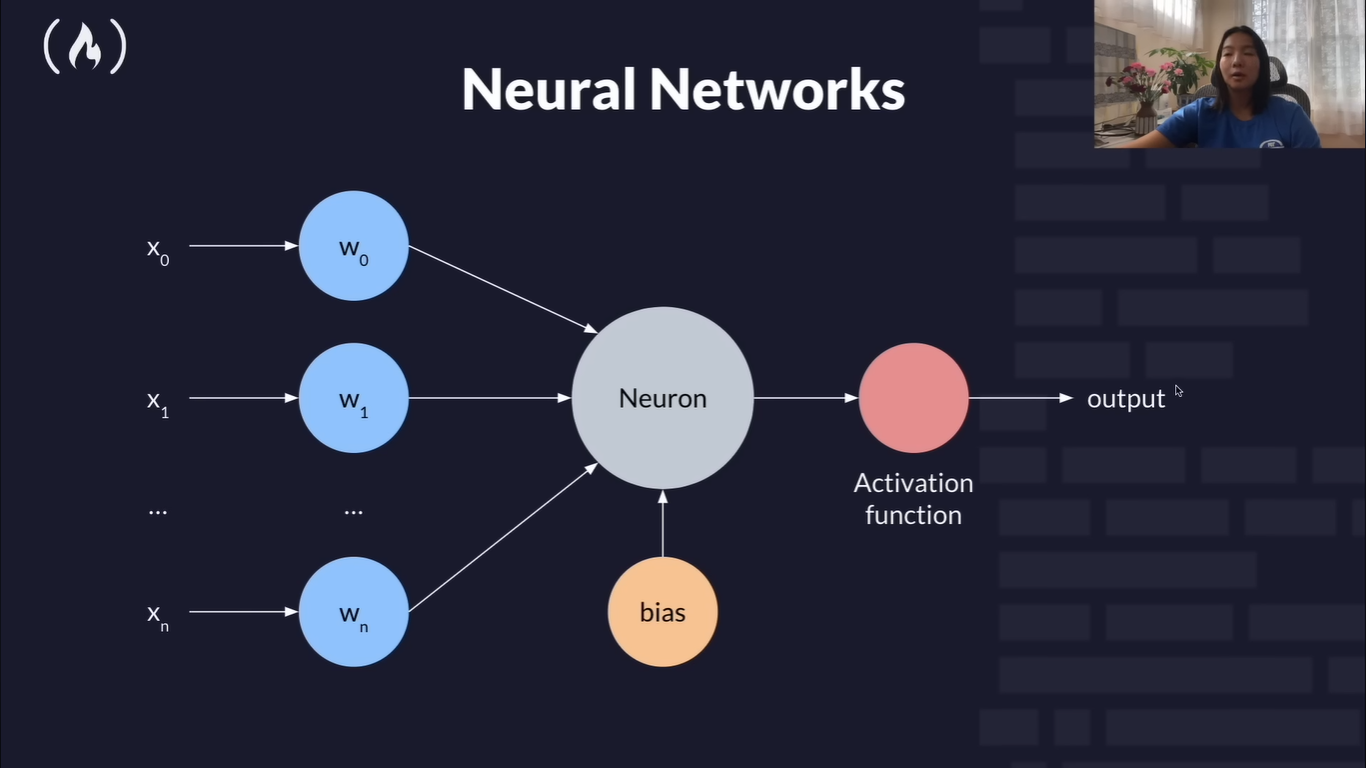

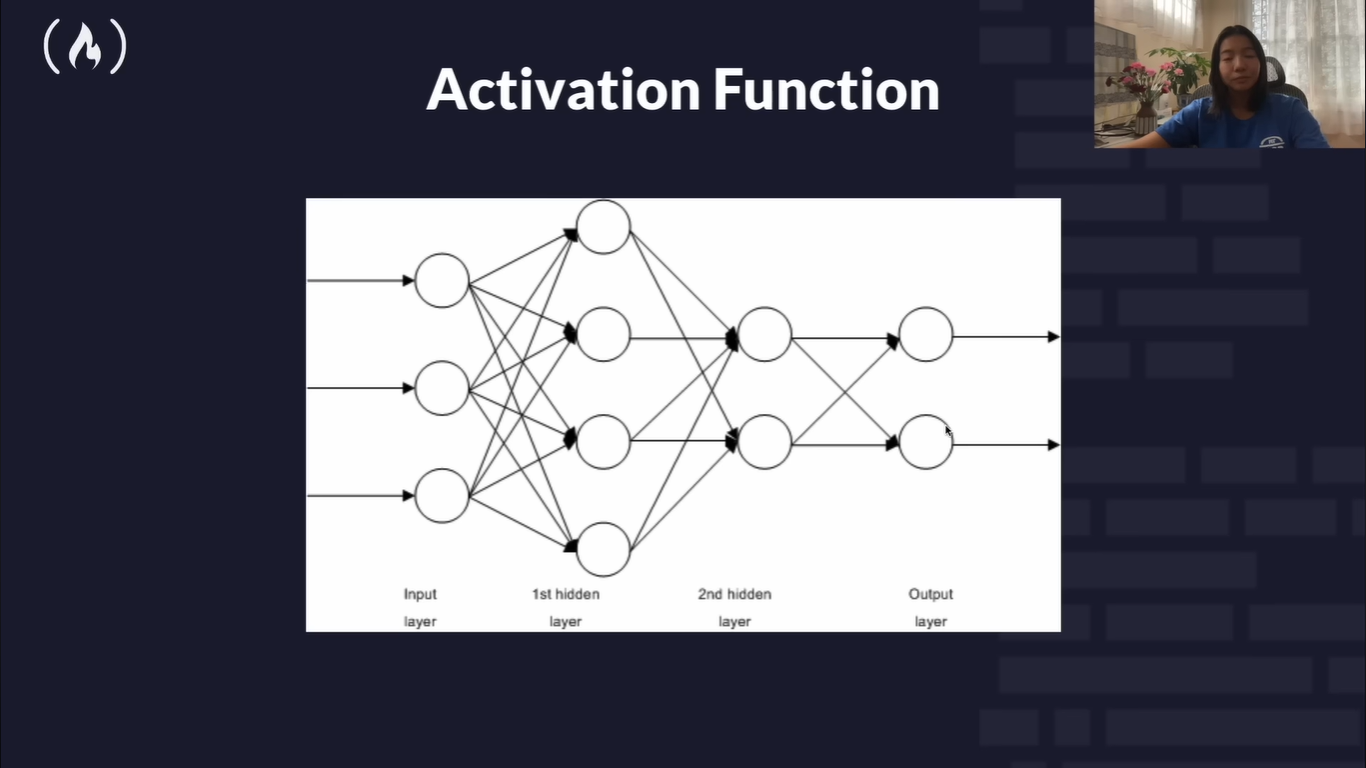

Without an activation function, it just becomes a linear model.

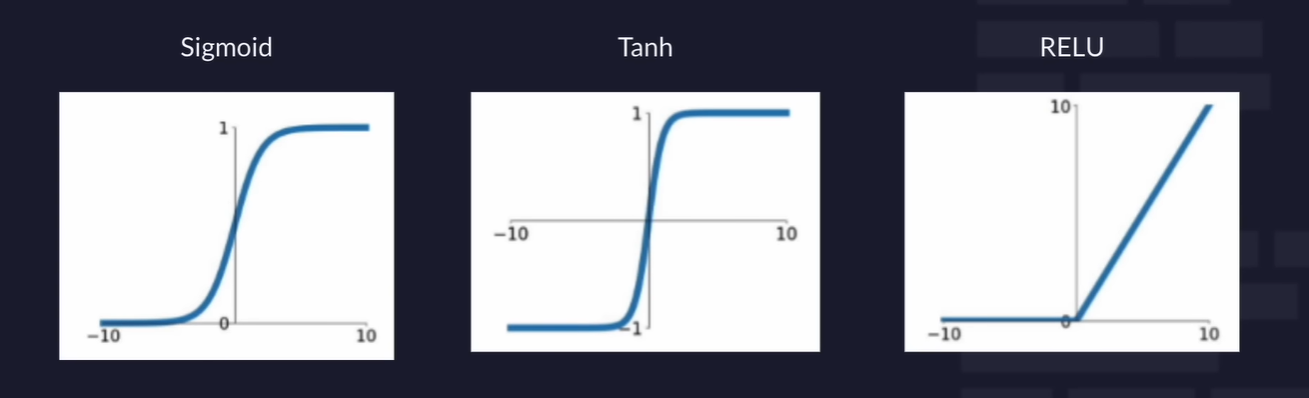

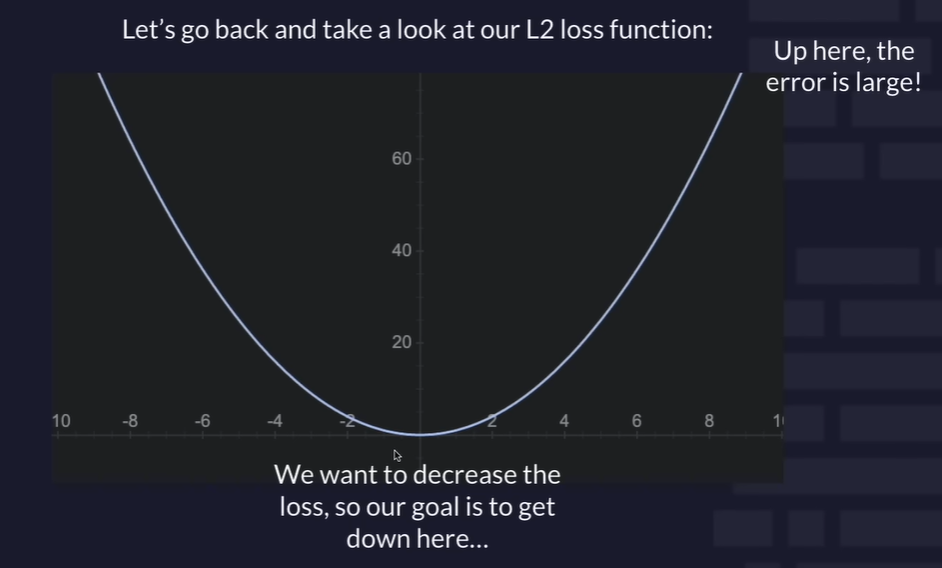

In [9]:
import tensorflow as tf

In [10]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation ='relu', input_shape=(10,)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(16, activation ='relu'),
    tf.keras.layers.Dense(1, activation ='sigmoid')
])

nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


A dense layer means that all the previous nodes are connected to that and a Dropout layer prevents overfitting

In [11]:
def plot_accuracy(history):
    plt.figure()
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Accuracy vs Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
def plot_loss(history):
    plt.figure()
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy Loss')
    plt.title('Loss vs Epochs')
    plt.legend()
    plt.grid(True)
    plt.show()

In [13]:
history = nn_model.fit(
    x_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0
)

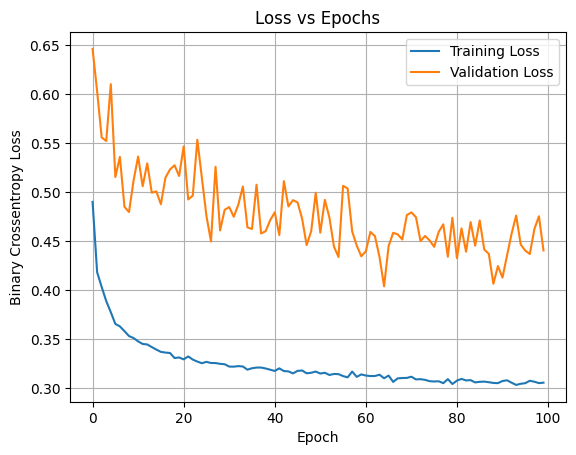

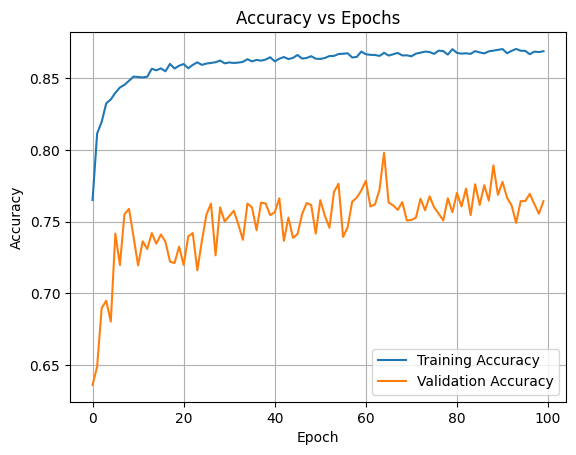

In [14]:
plot_loss(history)
plot_accuracy(history)

It is expected that our validation accuracy and loss is worse than training accuracy and loss because our model is adapting on training data whereas validation set is for the stuff it hasnt seen yet

In [15]:
y_pred = nn_model.predict(x_test)
y_pred = (y_pred>0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.75      0.80      1305
           1       0.88      0.93      0.91      2499

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

